Existing technology aware of:


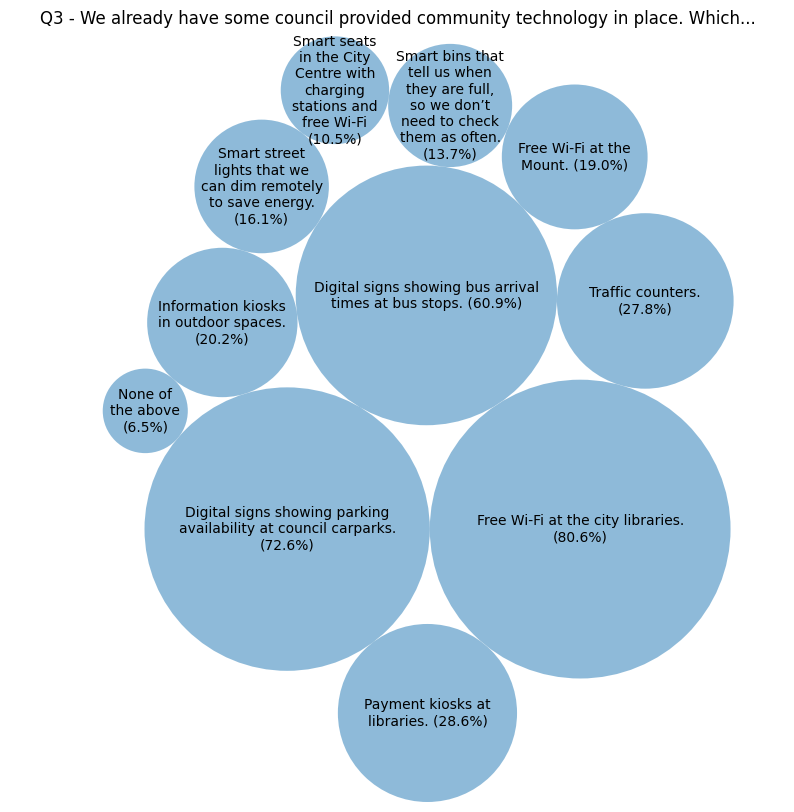

Technology would you like to see more of, and how likely are you to use them:


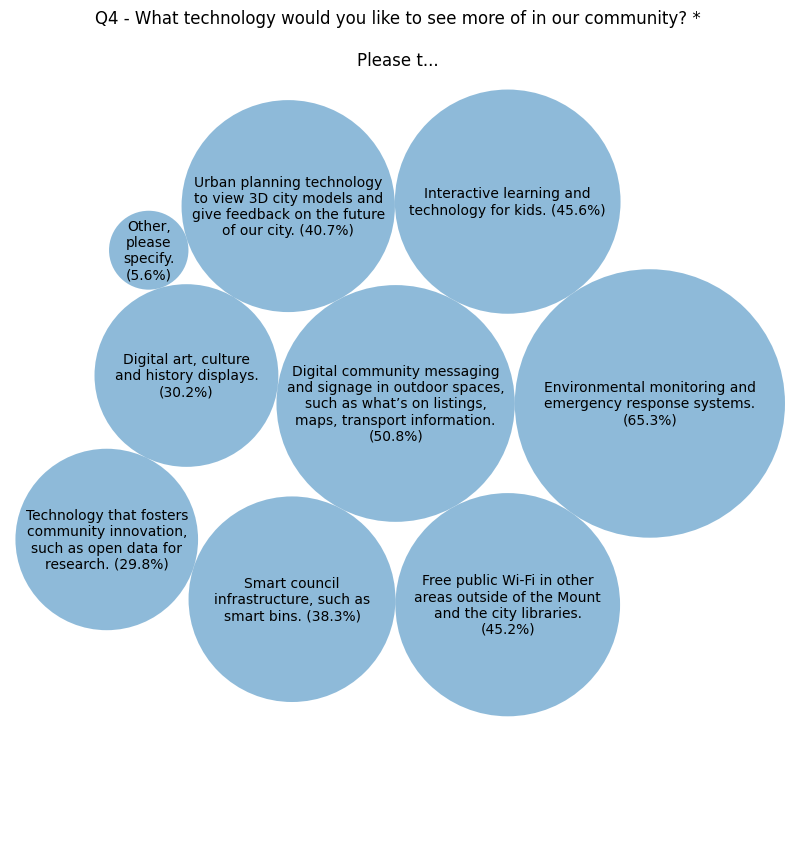

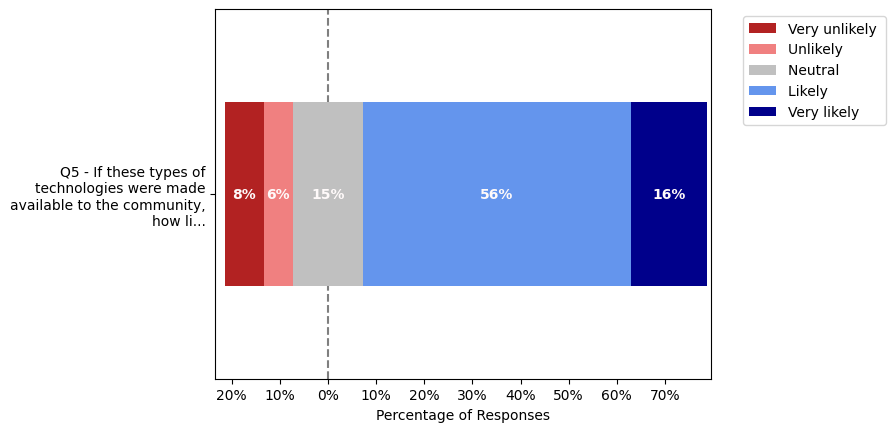

How important are the following outcomes:


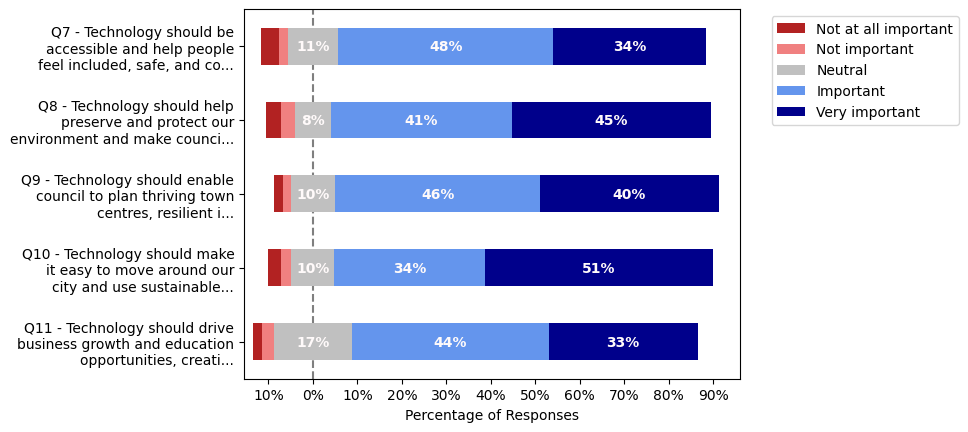

How important that technology improves the following:


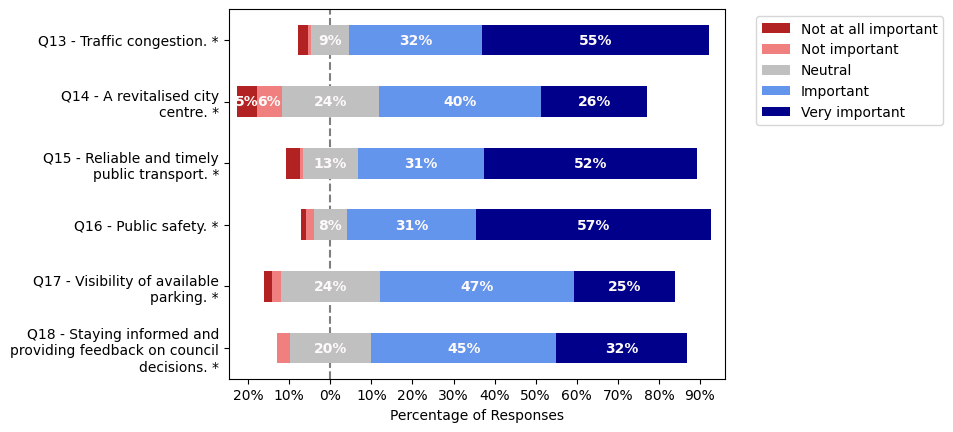

Preventing use of technology:


C:\Users\bjo5\PycharmProjects\SurveyVisualisation\word_cloud.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


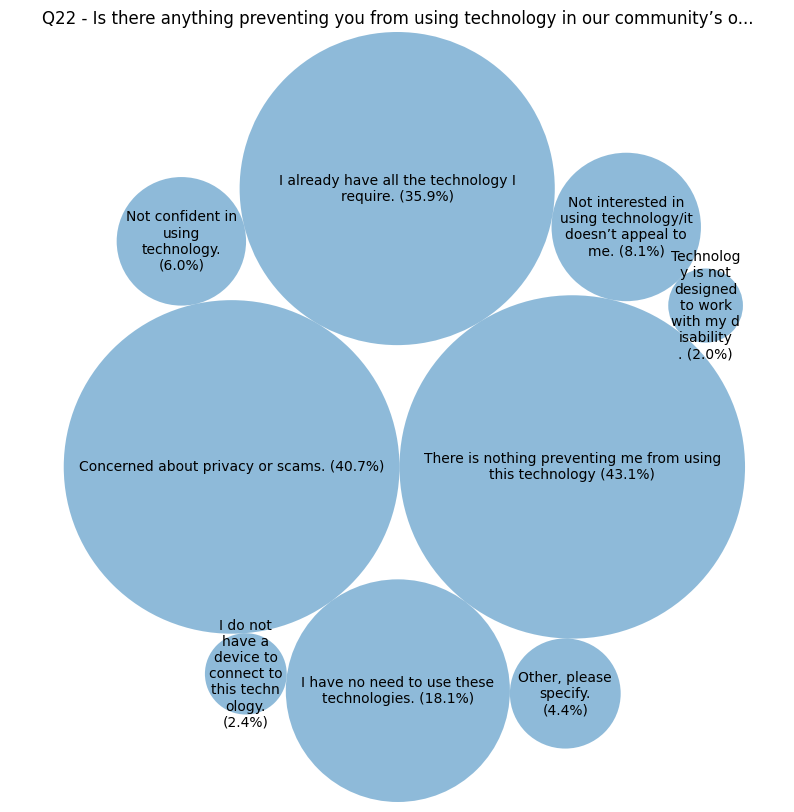

Rate digital skills:


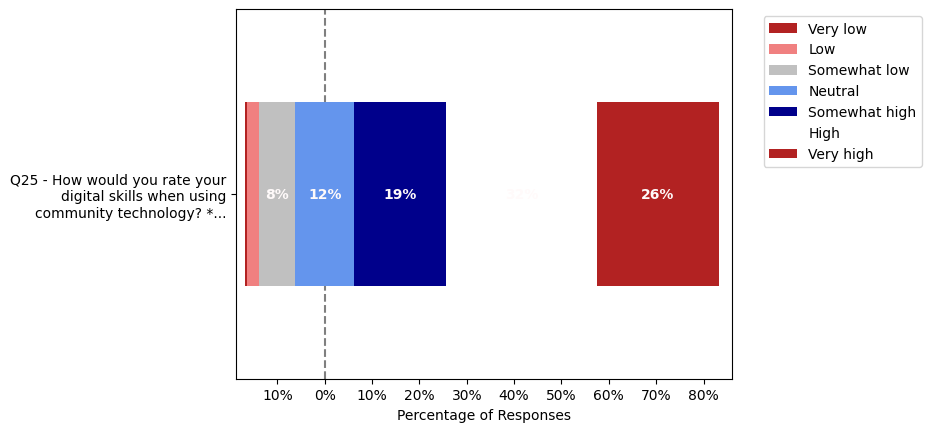

In [1]:
from word_cloud import visualise_column
from likert_ranking import unbalanced_figure, Scale

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import pandas as pd

df = pd.read_csv('data/all-responses.csv')
# print(df.columns)

print("Existing technology aware of:")
visualise_column(df, "Q3 - We already have some council provided community technology in place. Which...")

print("Technology would you like to see more of, and how likely are you to use them:")
visualise_column(df, 'Q4 - What technology would you like to see more of in our community? *\n\nPlease t...')
# Define the column range using the start and end column names
start_column = "Q5 - If these types of technologies were made available to the community, how li..."
end_column = start_column
unbalanced_figure(df, start_column, end_column, Scale.LIKELY)

print("How important are the following outcomes:")
start_column = 'Q7 - Technology should be accessible and help people feel included, safe, and co...'
end_column = 'Q11 - Technology should drive business growth and education opportunities, creati...'
unbalanced_figure(df, start_column, end_column, Scale.IMPORTANT)

print("How important that technology improves the following:")
start_column = "Q13 - Traffic congestion. *"
end_column = "Q18 - Staying informed and providing feedback on council decisions. *"
unbalanced_figure(df, start_column, end_column, Scale.IMPORTANT)

# ranking

print("Preventing use of technology:")
visualise_column(df, "Q22 - Is there anything preventing you from using technology in our community’s o...")

# ideas and examples

# feedback about council or technology

print("Rate digital skills:")
start_column = "Q25 - How would you rate your digital skills when using community technology? *..."
end_column = start_column
unbalanced_figure(df, start_column, end_column, Scale.SKILL)